In [1]:
import pandas as pd
import os
import numpy as np
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [2]:
import os
import random
import gradio as gr
import pandas as pd
import requests

from pyabsa import ATEPCCheckpointManager
from pyabsa.functional.dataset.dataset_manager import download_datasets_from_github, ABSADatasetList, detect_infer_dataset

aspect_extractor = ATEPCCheckpointManager.get_aspect_extractor(checkpoint='multilingual-256-2')


def perform_inference(text):
    result = aspect_extractor.extract_aspect(inference_source=[text],
                                             pred_sentiment=True)

    result = pd.DataFrame({
        'aspect': result[0]['aspect'],
        'sentiment': result[0]['sentiment'],
        # 'probability': result[0]['probs'],
        'confidence': [round(x, 4) for x in result[0]['confidence']],
        'position': result[0]['position']
    })
    return result, '{}'.format(text)




/Users/marikhomeriki/.pyenv/versions/3.10.6/envs/product_review_analysis/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/marikhomeriki/.pyenv/versions/3.10.6/envs/product_review_analysis/lib/python3.10/site-packages/tensorflow/core/framework/tensor_shape_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
/Users/marikhomeriki/.pyenv/versions/3.10.6/envs/product_review_analysis/lib/python3.10/site-packages/tensorflow/core/framework/tensor_shape_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please 

No CUDA GPU found in your device
Version 1.16.27 of pyabsa is outdated. Version 2.0.11 was released 7 days ago.
PyABSA INFO: The PyABSA >= 2.0.0 version contains breaking changes, if you want to use the training and inference scripts (in demos directory), please do not upgrade to the >= 2.0.0 version
check release notes at https://github.com/yangheng95/PyABSA/blob/release/release-note.json
Load aspect extractor from checkpoints/ATEPC_MULTILINGUAL-256-2_CHECKPOINT
config: checkpoints/ATEPC_MULTILINGUAL-256-2_CHECKPOINT/fast_lcf_atepc.config
state_dict: checkpoints/ATEPC_MULTILINGUAL-256-2_CHECKPOINT/fast_lcf_atepc.state_dict
model: None
tokenizer: checkpoints/ATEPC_MULTILINGUAL-256-2_CHECKPOINT/fast_lcf_atepc.tokenizer


Some weights of the model checkpoint at microsoft/mdeberta-v3-base were not used when initializing DebertaV2Model: ['mask_predictions.classifier.bias', 'mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.bias', 'mask_predictions.dense.weight', 'lm_predictions.lm_head.dense.weight', 'mask_predictions.dense.bias', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.classifier.weight', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.LayerNorm.bias']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special tokens have 

In [3]:
text = "This McDonald's has gotten much better. Usually my order would be wrong every single time so I would not leave that window until I checked every single item. I only hit up fast food once a month or so and it needs to be worth it. Also the fries used to be cold and the cheese on the burger was never melted. Everything was just lukewarm. Now my order has been right a few times in a row and my food hot. Also, I love dining room. Usually you wouldn't find me actually inside a fast food joint but this place has nice flooring, stacked stone, lots of large windows and a flat screen TV usually on HLN. Sometimes its nice to sneak away for a quick weekend breakfast, you know, a little budget and time friendly mommy and me date."

In [4]:
res = perform_inference(text)

/Users/marikhomeriki/.pyenv/versions/3.10.6/envs/product_review_analysis/lib/python3.10/site-packages/pyabsa/core/atepc/prediction/aspect_extractor.py:362: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:233.)
  lcf_cdm_vec = torch.tensor([f.lcf_cdm_vec for f in infer_features], dtype=torch.float32)


The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: This McDonald ' s has gotten much better . Usually my order would be wrong every single time so I would not leave that window until I checked every single item . I only hit up fast food once a month or so and it needs to be worth it . Also the <fries:Negative Confidence:0.9426096081733704> used to be cold and the <cheese:Negative Confidence:0.58629310131073> on the burger was never melted . Everything was just lukewarm . Now my order has been right a few times in a row and my food hot . Also , I love dining room . Usually you wouldn ' t find me actually inside a fast food joint but this place has nice <flooring:Positive Confidence:0.9997575879096985> , stacked stone , lots of large windows and a flat screen TV usually on HLN . Sometimes its nice to sneak away for a quick weekend breakfast , you know , a little budget a

/Users/marikhomeriki/.pyenv/versions/3.10.6/envs/product_review_analysis/lib/python3.10/site-packages/pyabsa/core/atepc/prediction/aspect_extractor.py:410: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = [float(x) for x in F.softmax(i_apc_logits).cpu().numpy().tolist()]


In [5]:
res[0]

,aspect,sentiment,confidence,position
0,fries,Negative,0.9426,[54]
1,cheese,Negative,0.5863,[61]
2,flooring,Positive,0.9998,[116]


In [6]:
df = pd.read_csv('/Users/marikhomeriki/code/marikhomeriki/raw_data/data_dishoom.csv', header = None)
df = df.rename({0: 'label', 1: 'text'}, axis = 1)

In [7]:
df = df.dropna()

In [8]:
df = pd.DataFrame(df.text)

In [9]:
def get_aspect_dfs(data):
    dfs = []
    for row in data.iterrows():
        text = row[1][0]
        df = perform_inference(text)
        dfs.append(df)
    return dfs
        

In [ ]:
def get_aspect_distribution(dataframes):
    aspects = {}
    sents = []
    for df in dataframes:
        for a, s in df[0].iterrows():
            word_all = s[0].split()
            word = word_all[0]
            if aspects.get(s[0]) is None:
                sents = []
                sents.append(s[1])
                aspects[s[0]] = sents
            else:
                sents = aspects.get(s[0])
                sents.append(s[1])
                aspects[s[0]] = sents
    return aspects
            


In [11]:
dfs = get_aspect_dfs(df)

/Users/marikhomeriki/.pyenv/versions/3.10.6/envs/product_review_analysis/lib/python3.10/site-packages/pyabsa/core/atepc/prediction/aspect_extractor.py:410: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = [float(x) for x in F.softmax(i_apc_logits).cpu().numpy().tolist()]


The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: Hundreds of happy customers come through every hour . Don ' t let the outdoor queue scare you off as it did me last night but I came back for <lunch:Neutral Confidence:0.9826374650001526> today and the line , albeit the length of the restaurant , only took 20 minutes or less . All the <employees:Positive Confidence:0.9998501539230347> were very courteous and pleasant . The <chicken:Positive Confidence:0.9986103773117065> ruby was just amazing and very complex . There was not a drop left . The <paneer:Negative Confidence:0.595012903213501> tikka is probably meant to be shared and was a bit underwhelming . We got a downstairs table near the <bar:Neutral Confidence:0.999173104763031> and dishwasher so it was terribly noisy with all the silverware . But , it was also indicative just how popular this place is .
The results 

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: Wow wow wow . . A very memorable experience and <service:Positive Confidence:0.9996248483657837> provided by ALEX at this location on 3rd of November . Alex was attentive and charming , he made sure that my friends and I were well taken care of for the evening . I happen to have a mango allergy but the <manager:Positive Confidence:0.9815433621406555> was able to resolve that issue quickly with a special menu that was checked off by the <chef:Positive Confidence:0.8594949245452881> with all the <dishes:Positive Confidence:0.7036543488502502> that did not have Mango in it . I was grateful and very appreciative of such wonderful gesture and hope the restaurant continues to provide this caliber of <service:Positive Confidence:0.9996248483657837> in our future visits . Marvelous time spent and would highly recommend this lo

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: Finally tried the famous Dishoom on a recent trip to London . I was prepared for a long <line:Negative Confidence:0.8683855533599854> for dinner and I think in total it took about 45 minutes for my party of 1 . While in line the passed out samples of their <chai:Positive Confidence:0.9969634413719177> which was a great way to get ready for the meal . I was seated in the back courtyard which was perfect though I will say the action seems to be downstairs with hustle and bustle . For my meal I got the <vegetable samosas:Positive Confidence:0.99925297498703> ( phenomenal ! ) , garlic naan , and the chicken ruby . There were so many options to choose from I would ' ve liked to split a few things with friends to really get a sampling . Overall a nice experience !
The results of aspect term extraction have been saved in /Use

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: House chaat 8 . 65 / 10 - sweet <potato:Positive Confidence:0.9990441203117371> with the crisps was a great texture and flavor . Really enjoyed how they had <chutney:Positive Confidence:0.7848144769668579> included <House chai:Positive Confidence:0.6299441456794739> 7 . 32 / 10 - it was okay , not as much of a <chai flavor:Negative Confidence:0.7684797644615173> as expected . Way too hot when it first came out Masala <fish:Positive Confidence:0.7376547455787659> 7 . 34 / 10 - this was good , very spicy but flavorful but only due to the spices tbh . The <fish:Positive Confidence:0.7376547455787659> was huge alsoKebab 5 . 64 / 10 - good however could use a lot more flavor and was also kind of small . The <onions:Positive Confidence:0.6952052712440491> in compliments added a lot to the kebab Chicken 7 . 32 / 10 - this was

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: The line in Convent Garden at around 9 pm only took us 45 minutes , way better than their busiest location near Carnaby if I may say . This is also a newer and bigger location so the <ambience:Positive Confidence:0.7270828485488892> is amazing . We ordered the chicken ruby , chicken berry biryani , veggie samosas , and <garlic naan:Neutral Confidence:0.8234013319015503> . Everything was amazing ! ! It was worth the <wait:Positive Confidence:0.9905691146850586> and hype . 5 / 5 .
The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: After having owned the cookbook from Dishoom for a while , I was really excited to try the dishes straight from the origin . I made a reservation for one during lunch hours on 

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: Been wanting to try out Dishoom for the longest time as it is the most reviewed place in London , insane considering there are other world - famous landmarks like the Big Ben and the British Museum . Made a reservation online and was seated promptly in a cute dome - shaped booth . - Chicken Ruby - This is essentially butter chicken and I really enjoyed the flavor which had hints of ginger in it . The chicken was also very tender and flavorful . My one complaint though is that the dish didn ' t come with naan or rice and this is given that you know , so you do have to order an extra side in order for the main dish to not be so salty . - Garlic Naan - Good relief from the saltiness of the chicken ruby . To be honest , you couldn ' t really taste the garlic bit of it , so I wouldn ' t say you have to order the garlic flav

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: Awesome <food:Positive Confidence:0.9965437054634094> ! ! ! ! ! ! Reasonable <price:Positive Confidence:0.8241389393806458> ! <Service:Positive Confidence:0.9643459320068359> and <ambience:Positive Confidence:0.9989198446273804> - excellent <Chai tea:Positive Confidence:0.999599039554596> was pretty good too ( not sure why people hype about it tbh . But I mean it ' s okay ) <Chicken Tikka with garlic naan:Positive Confidence:0.9998345375061035> are a must try !
The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: LOVE this spot ! I tried going to the Kings Cross location twice after work and both times , there was a line so I didn ' t wait . I went to this location once too and there was also a line so I

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: We had to wait in <line:Positive Confidence:0.7032313346862793> for about 40 mins but they brought us sherry to warm us and we loved the bustling <two story dining rooms:Positive Confidence:0.9968180656433105> . The <menu:Positive Confidence:0.9994989633560181> is large and everything was delicious . We started with <vegetable samosas:Positive Confidence:0.9197386503219604> ( good but small ) , <Pau Bhaji:Positive Confidence:0.8653124570846558> ( delicious and fun to assemble ) . Then we had the signature <black daal:Positive Confidence:0.8750388622283936> ( good but not earth shattering ) , the jackfruit <biryani:Positive Confidence:0.9094919562339783> ( get this ! ) , the <mattar paneer:Positive Confidence:0.9423182010650635> ( also a winner ) , the <raita:Positive Confidence:0.8983556628227234> ( thick and a generou

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: I wanted to check out the hype so my friend and I got into the long queue outside the doors on a Thursday evening . The line moved quickly , but for my party of 5 , we got sat in 10 minutes ! Our <waiter:Positive Confidence:0.9998791217803955> was very accommodating to us putting in our orders multiple times and keeping our menu with us . Specifically for the <food:Positive Confidence:0.9992801547050476> , it was absolutely delicious , especially for the <price:Positive Confidence:0.998875081539154> . THE <CHAI:Positive Confidence:0.9990930557250977> was bottomless and the best chai I ' ve actually ever had . We had asked the <server:Positive Confidence:0.9976212382316589> for advice on what to order and all of it was delicious . Things I ordered that I would definitely get again : Bhel , <Chili:Positive Confidence:0.9

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: Amazing <food:Positive Confidence:0.9998699426651001> and <beverages:Positive Confidence:0.9998950958251953> . Kind and helpful <staff:Positive Confidence:0.9997947812080383> . Felt welcome and <prices:Positive Confidence:0.9982693195343018> were reasonable . Arrived before the long queue formed so try to arrive before " normal " dinner time and you ' ll probably not have much of a <wait:Positive Confidence:0.9984320998191833> . Also ordered <delivery:Positive Confidence:0.9979864358901978> once and was well packaged and hot / fresh . Try it , you shan ' t regret it .
The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: Incredible <food:Positive Confidence:0.9998704195022583> and ambiance . Just go at of

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: I came here on recommendation from locals and travel friends . I can ' t say this was a stand - out place , I ' ve definitely had better , cheaper <Indian cuisine:Positive Confidence:0.9739970564842224> in the US . The <queue:Positive Confidence:0.7488611936569214> to be seated was very long . They have <outdoor heaters:Positive Confidence:0.5738075375556946> to keep sections of the queue warm .
The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: Although I live in Los Angeles , I visit London twenty days ago . This <restaurant:Positive Confidence:0.9997772574424744> was recommended by a cab driver , then Yelp confirmed it . My wife and I luckily arrived before a long line of diners formed in front . Ou

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: Best vfm of <Indian cuisine:Positive Confidence:0.9999097585678101> in London . Everything we ordered was tasty . Be ware to ask before , how spicy the <dish:Positive Confidence:0.989852249622345> is . . .
The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: Worth it . Go here . ignore the local haters that say this is for tourists . It ' s SO SO GOOD .
The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: Dishoom lives up to the hype . We got the <lunch:Neutral Confidence:0.8135982751846313> feast as a large group ( 9 people ) and the <service:Negative Confidence:0.9703539609909058> , thou

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: An irani Indian restaurant - so everything is kinda a fusion and taste different from southern Indian or Punjabi restaurants - be prepared for long <line wait:Negative Confidence:0.9977450966835022> but worth it - my favorite was <Masala fish:Positive Confidence:0.9998310804367065> which is unique to this restaurant
The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: It was fantastic every <plate:Positive Confidence:0.9998774528503418> we had was delicious ! The Fried Okra ( not pictured ) , Ginger Lemon Tea , Spicy Lamb Chops , Ruby Chicken .
The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Exa

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: Super <ambience:Positive Confidence:0.999904990196228> and tasty <food:Positive Confidence:0.9998935461044312> . We were served chai while waiting as well ! Definitely worth visiting
The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: Dishoom was AMAZING . Totally lived up to the hype . <Food:Positive Confidence:0.9999237060546875> was phenomenal and so reasonably priced , and the <service:Positive Confidence:0.9999330043792725> was amazing . Everyone was so kind and really just made it a great experience . Could not recommend more !
The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: Ex

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: Good <food:Positive Confidence:0.9998027682304382> ( but be prepared for spiciness ! ! ! ) but ridiculous long <lines:Negative Confidence:0.9997009038925171> , and the restaurant couldn ' t really keep up with cleanliness due to the volume of customers . Loud with lots of big <tables:Positive Confidence:0.9755550026893616> for groups , but not ideal for couples .
The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: Great place for <Indian food:Positive Confidence:0.9881171584129333> . Fantastic <value:Positive Confidence:0.9998860359191895> and lots of choices - always visit here when in london
The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: One of the BEST Indian restaurants we ' ve gone too . When visiting England , we make it a priority to eat there . Went to the one in Manchester this time , as well . Very cool <building:Positive Confidence:0.7176137566566467> and <vibe:Positive Confidence:0.9764010310173035> . The <wait:Neutral Confidence:0.6468418836593628> can be long , but worth it ! <Food:Positive Confidence:0.5723226070404053> comes out timely , <servers:Positive Confidence:0.9878790974617004> are great and helpful .
The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: This place is amazing . So good we went twice on our trip around the UK . Tons of great options , loved the ruby <chicken:Positive Confidence:0.99988853931427> , bla

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: Far and away the best <Indian food:Positive Confidence:0.9998946189880371> I have ever had , and the best food I had while in London . Everything was incredible and I ate after I was full because I physically couldn ' t stop myself from doing so . The gunpowder <potatoes:Positive Confidence:0.9998975992202759> , <lamb samosas:Positive Confidence:0.9998929500579834> , chicken ruby , and chicken tikka were my favorites and if I ' d ordered the whole <menu:Positive Confidence:0.8230475187301636> they all would likely be my favorites . This was our first time here and when the <waiter:Negative Confidence:0.7841635346412659> recommended so many dishes I was somewhat skeptical but I now wish I ' d ordered twice as many because nothing was disappointing and I can only imagine the second half of the <menu:Positive Confidence:0

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: One of the best Indian restaurants in london . The <black dal and butter chicken:Neutral Confidence:0.9618823528289795> are amazing <dishes:Positive Confidence:0.9998698234558105> as well as the <fried okra:Positive Confidence:0.9998263716697693> . The <staff:Positive Confidence:0.9999006986618042> were super nice too
The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: From the moment we arrived I loved the <place:Positive Confidence:0.9998650550842285> . The <building:Positive Confidence:0.9998751878738403> , the <location:Positive Confidence:0.9998835325241089> , and the <interior:Positive Confidence:0.9998906850814819> are all tastefully done , and the <staff:Positive Confidence:0.9998962879180908> w

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: Came for <brunch:Neutral Confidence:0.954837441444397> and was very impressed with their covid precautions and <service:Positive Confidence:0.9998586177825928> ! Unlimited <chai refills:Positive Confidence:0.9998548030853271> were amazing . I ordered the Akuri and house <chai:Positive Confidence:0.9873215556144714> . Both were excellent ! Very friendly <staff:Positive Confidence:0.9947693943977356> and beautiful <restaurant:Positive Confidence:0.9951025247573853> .
The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: Great <food:Positive Confidence:0.9999395608901978> . Small <plates:Positive Confidence:0.9999008178710938> were delicious . Friendly <server:Positive Confidence:0.99993896484375> . Complime

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: This is a well - run restaurant with great <food:Positive Confidence:0.9995998740196228> . I had to wait 20 min for a table , but once I was seated , the <service:Positive Confidence:0.9969006776809692> was superb . My <server:Positive Confidence:0.9717212319374084> was extremely knowledgeable and helpful to me as I navigated the menu . I had the <matter paneer:Positive Confidence:0.8432604074478149> , <garlic nan:Positive Confidence:0.9429193139076233> , and a small broccoli salad ; all were remarkable . I couldn ' t find a single fault with Dishoom , and I doubt that you will either .
The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: The line was long but SO worth it ! First experience with <Indian 

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: 1750 Yelp reviews . All good so we had to eat here when we were in London . Wouldn ' t wait an hour on line anywhere to eat so we ate here for lunch . You check in upstairs . Apparantly you can make reservations here for lunch . We were sent downstairs to wait by the bar . The entire downstairs was packed . 15 minutes passed and our beeper went off . No seats available upstairs so we ate downstairs . <Tables:Positive Confidence:0.6004648804664612> are very close to each other . Our <waiter:Positive Confidence:0.5898380875587463> was very friendly and helped us order . We had vegetable samosa , side of vegetables ( broccoli , kale and green beans ) , raita , rice , nan and chicken . All the <food:Positive Confidence:0.8941345810890198> here is very good . Would return ( for lunch hahaha )
The results of aspect term extr

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: I went here on the recommendation of a friend originally from India , so I had pretty high expectations . Dishoom lived up to them and more . The <food:Positive Confidence:0.9989749193191528> was all incredibly flavorful and I am already planning to attempt a recreation of the black <daal:Positive Confidence:0.6378385424613953> at home because it was that good . <Prices:Negative Confidence:0.5843461155891418> are a bit high , but at the same time pretty reasonable for London . My husband and I shared the daal , chicken tikka , naan , rice and <bowl of greens:Neutral Confidence:0.9995282888412476> and it was a bit too much <food:Positive Confidence:0.9989749193191528> for <lunch:Neutral Confidence:0.7214590311050415> ( I should probably note we ' re both not huge eaters , so if you have a large appetite this would proba

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: Excellent <food:Positive Confidence:0.9995620846748352> and <service:Positive Confidence:0.9988621473312378> . The <lines:Negative Confidence:0.9992469549179077> are long , but once you have the opportunity to dine there you will understand why .
The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: Outstanding <Indian cuisine:Positive Confidence:0.9998652935028076> located in the heart of London , just north of Picadilly Circus . Came here on a Thursday afternoon for a late lunch - reservations are a must . RESTAURANT : Two floors with a bar downstairs for waiting and casual drinks . I preferred sitting on the mainfloor to get the natural lighting . Cozy and comfortable . FOOD : Ordered the lamb , samosa

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: TIMING : - Got in line at 5pm on a Saturday - Was told it will be an hour and 40 minutes - Stood in line for 50 minutes in cold and rain but got tea ! - Food came very quickly and we finished everything within 50 min . FOOD : 1 . Hot tea ( pot ) - Hot , comes with a tea leaf filter 2 . Garlic naan - Texture : light , thin - Seasoning : not enough garlic - Portion : 1 naan cut in half - so it seems like there ' s more ! 3 . Cheese naan - Texture : light , thin - imagine the cheese streaming video - Seasoning : just the right amount of cheese - Portion : 1 naan cut in half - so it seems like there ' s more ! 4 . House black daal - Texture : thick and creamy - Seasoning : spicy ( my tolerance level is about 2 / 5 ) - Portion : perfect for 2 people 5 . Chicken ruby ( their version of chicken tikka masala ) - Texture : thic

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: You know a place is good when you get multiple recommendations from various friends before a trip . Four different friends recommended Dishoom . I definitely wanted to eat Indian food while in London , so I was determined to try Dishoom . It took me three tries to eat there , but when I finally did have dinner there , I was not disappointed . I saw the line down the sidewalk one day and decided to come back the next day . I ' m glad I got there somewhat early ( 4 : 30p ) because I still had to wait 40 minutes . They offered some sort of milk drink in the line , but I didn ' t have any . I did have some water , when I was able to wait at the bar for my table . My server was so helpful and provided suggestions . I was starving , but didn ' t want to order too much food so he helped me pick out some dishes . I started wit

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: This was one of the best restaurants in London ! Hands down ! ! ! <Food:Positive Confidence:0.9998154044151306> and <staff:Positive Confidence:0.999850869178772> are both top notch !
The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: About as good as it gets . Most recent visit , got the black daal and regular naan to start , followed by the chicken ruby with roomali roti . ( It was a lot for a solo lunch . . . ) The black daal is amazing , although there ' s so much else I want to try here it ' s hard to say whether I ' d get it again next time . The chicken ruby , on the other hand , would be hard to ever skip - - I get that this is the most basic of Indian dishes , but it ' s so incredible , and the

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: This place is THE PLACE . I wanna start by saying that I am dying to hop back across the pond and get in for dinner solely based on how BOMB my brunch experience was here at Dishoom Covent Garden . I ' ve heard non - stop chat about how great this place is , so I was very happy to get in and try it out myself . I ' m just gonna go ahead and let y ' all know what I had and why it was the best : If you like meat ( and boy do I ever ) , then you HAFTA order the Wrestler ' s Naan Roll : smoked streaky bacon , peppery pork sausages , and runny - yolked egg . . . Perfectly cooked bacon and sausage , with a brilliantly cooked egg with JUST the right amount of runny - yolk ! This was one of the best breakfasts I had while in London . ON TOP OF their tasty food ( and incredibly reasonable prices ) , is the House Chai . . . whic

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: When in London , one must Dishoom ! This restaurant really embodies the true British - Indian cuisine of London , showing how traditional flavors can be highlighted by subtle western undertones . If you are a vegetarian , then this restaurant is an excellent choice . If you are an omnivore , please given the vegetarian dishes here a chance because they are much tastier than the meat options . The house black dal is delicious . Yes who knew that dal , which is one of the average Patel ' s staples in Indian . could be such poetry to one ' s palate ? ! I am still dreaming of this dal for weeks after my trip . Dal is simply made of lentils , but the way it was slowly cooked in the cream highlights the richness of natural legume flavor . Dip it in roti , nan , eat it with a spoon - however you like and it can ' t be wrong !

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: London is known for its <Indian food:Positive Confidence:0.9997490048408508> , but it should be known for this place specifically ! The long <wait:Positive Confidence:0.9794803857803345> , around 40 mins , was well worth it . We ordered <drinks:Positive Confidence:0.9998635053634644> to pass the time , which were delicious . My boyfriend ordered for us , as he grew up with this cuisine . The <naan:Positive Confidence:0.9998750686645508> was perfect , the <sauces:Positive Confidence:0.999873161315918> perfectly spicy or sweet , the <greens seasoning:Positive Confidence:0.9997437596321106> were delicious , and the <lamb / chicken plates:Positive Confidence:0.9998112320899963> were perfect . We kept ordering more and it seemed like we couldn ' t go wrong ! Spiked <chai:Positive Confidence:0.9699373841285706> was a nice en

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: Food / Drink : we started off with the Okra fries which was basically vegetables but lightly fried with a thin crust . It came with three sauces ( all of which are delicious and we later dipped our naan in ) . For entrees we ordered the chicken ruby which was divine ! ! Definitely worth the hype , it had a sweetish taste to it . We also got the house daal . I ' m personally not a lentil person so this dish was mediocre for me but it can really fill you up . We got both the rotti and garlic naan with it . The rotti was quite thin and couldn ' t absorb all the curry so we had to get another order of garlic naan which was amazing , hot and fresh . Overall the food is delicious and worth the line ! Price : while individual items are average priced , piling on altogether can add up to a large bill in the end . It is worth i

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: Had to wait outside but wasn ' t too bad and they hand you chai or mint tea while you wait . Probably waited 30 mins for a table for 4 on a Wednesday evening . For apps we shared be okra which was my favorite <dish:Positive Confidence:0.9996656179428101> of the meal , shrimp , and bau bahji . Mains we had a chicken tikka masala type curry ( was called something else but was similar to this ) and a South Indian shrimp curry . Neither of these were mind blowing but still good . Their <red chutney sauce:Positive Confidence:0.8164489269256592> was another highlight .
The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: I don ' t normally eat Indian food so I was a bit skeptical when my coworker said he wante

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: One of the best <dining:Positive Confidence:0.9997943043708801> experiences we had on our trip to London . Get there early though , it ' s popular and lines do form to get in .
The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: Delicious and innovative . Stopped in here and was exhilarated by the taste and experience of <Dishoom:Positive Confidence:0.9999451637268066> . Definitely recommend !
The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: We really enjoyed the place . Great food , ambiance , and service . For those of you visiting London , you may hear constant recommendations for 

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: Simply fantastic ! Dishes are small and you are intended to order many . Fragrant , fresh , delicious . We ordered off of the breakfast menu , it was so good we stayed for lunch as well . <Chicken:Positive Confidence:0.9998303651809692> tikka = excellent ! <Service:Positive Confidence:0.9993391633033752> was top notch , friendly <servers:Positive Confidence:0.9996762275695801> and helpful as well . The <restaurant:Positive Confidence:0.9986792206764221> itself has a super cool vibe ( especially in the lower level dining room ) . Absolutely will be coming back again !
The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: A memorable dining experience and MUST DO when visiting London . They know how to do I

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: We dined here after many recommendations from friends far and wide . Locals and tourists both see this one as a favorite . The entrance can be a little daunting . There is a hostess outside you check in with and then <wait:Neutral Confidence:0.819658100605011> in an outdoor line . Then you are brought downstairs to the <bar:Positive Confidence:0.5945835113525391> area to have cocktails and wait . The wait was long but well worth it . We dined on everything our <server:Positive Confidence:0.9995118379592896> recommended and more . It was my first time trying <Indian food:Positive Confidence:0.9995347261428833> and I loved it ! The <service:Positive Confidence:0.9976690411567688> was quick as they are used to taking care of many people at once and the <food:Positive Confidence:0.9994445443153381> was delicious . It is <t

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: Absolutely amazing <food:Positive Confidence:0.999916672706604> ! ! One of the best places we visited in London . <Atmosphere:Positive Confidence:0.9999035596847534> , <food:Positive Confidence:0.999916672706604> , <drinks:Positive Confidence:0.9999047517776489> , all of it was perfect !
The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: I had been to Dishoom many years ago , didn ' t know they did breakfast but a quick internet search taught me that they are super popular for breakfast and with good reason ! We made a <reservation:Positive Confidence:0.9860101938247681> for 9 . 15 am online for a Saturday morning and it was fully seated . However , we took our good time to enjoy the super delicious <b

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: My friend and I went to Dishoom on our first night in London . We got there around 8pm on a Saturday night and there was a line out the door . They don ' t take reservations so you ' re literally stuck waiting in line until they call you . I ' ve heard London has pretty good Indian food and this place was highly reviewed , so we didn ' t mind waiting . It took about an hour or so before we got seated downstairs . After browsing the menu , we decided on the okra fries , the chicken ruby , and the paneer tikka . We got our food pretty quickly , and from what I remember , nothing stood out . The okra fries were the best part of the meal , but they still weren ' t memorable . The chicken ruby was alright , the chicken was a bit dry imo . The paneer tikka I could ' ve done without . All the food was just meh . For a place t

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: Betcha didn ' t know they served breakfast ! ! Food 4 / 5 Swap out your regular butter toast for a wide selection of fresh baked <naan:Positive Confidence:0.9996743202209473> . Loved the <onion jam:Positive Confidence:0.9997969269752502> it came with . Superb <Sausage:Positive Confidence:0.9997001886367798> and <egg naanEgg:Positive Confidence:0.9998475313186646> naanChili Cheese Toast TIP : FREE FLOW House made Chai Tea to warm you up on a rainy morning Service 4 / 5 <Staff:Positive Confidence:0.9994503855705261> are hip and attentive ! Vibe 4 / 5 Love the <incense:Positive Confidence:0.9848374724388123> burning at the entrance !
The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: This was our favorite

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: I heard from several friends who recommended this place , and now I know why ! Dishoom was absolutely delicious , and even though I don ' t really eat Indian food , I love the food here ! Food : 5 / 5 ! Actually all of the dishes were delicious , not a single one fell short . We had the okra fries and calamari , and both were fried perfectly , but very oily . Okra fries were almost like yam fries ! The chicken tikka was good , but not spectacular . The lamb kebabs were better I think , but personally not a huge fan of lamb . The lamb biryani was one of my faves ! The rice is amazingly blended with different flavours , and we added Raita to it too ( felt almost like chicken over rice . We also ordered a bowl of greens which was actually very good and helped balance out the heavy meat dishes . I highly recommend the garl

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: Overall fantastic <India:Positive Confidence:0.999891996383667> and great for a group meal . I ' ve eaten here several times and have always enjoyed the experience .
The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: One of the best <meals:Positive Confidence:0.9998775720596313> ever , in my life ! The <wait:Negative Confidence:0.9969983100891113> was long and it was raining ( Dishoom provides umbrellas ) but completely worth it ! Don ' t miss out , next time in London eat here !
The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: 1 . Service - very attentive and friendly . Both times I

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: Is there a better place in London for <breakfast:Positive Confidence:0.9678956270217896> ? I think any conversation on the subject has to include any of the Dishoom locations in a discussion of the final three ( please send me your favorites ! ) . Was there when it opened on a Saturday and had a Wrestler ' s Naan Roll with the <house:Neutral Confidence:0.6374995112419128> chai that just kept on coming . I had some writing work I was doing and despite the fact that the restaurant continued to fill up I was never rushed or hurried or made to feel like I could stay forever ( I ' ve experienced that same hospitality at the Kings Cross location ) . If you ' re even thinking about coming here for breakfast , or any <meal:Neutral Confidence:0.5523964762687683> , cease your thinking and get to booking .
The results of aspect t

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: I had always thought I did not like Indian food until I dined here . Indian food was either too overwhelming , too spicy or too sweet for my taste especially after visiting Mumbai many years ago . Mumbai ' s food evidently was not as life changing for me as the food at this Indian restaurant located in the middle of Covent Garden . Dishoom is a great experience if you are looking for fabulously interesting and ethnic food experience in London . You can ' t get reservations . You just have to show up and wait in line for over an hour to get a table . But trust me , it ' s worth it . We have only tried a few dishes here . However , an absolute must would be Chicken Ruby even if you don ' t like chicken . It ' s all about the exquisite sauce ! For dessert , definitely try the Pistachio Kulfi on a stick . It ' s like ice c

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: Love the <interior decoration:Positive Confidence:0.9998757839202881> ! It was fun . I remembered there ' s a sign at the door saying something like " sorry cash only " or " no credit card " . I didn ' t plan to step in until they told me it was a joke . Went here for brunch . <Chai:Positive Confidence:0.9997664093971252> was great ! Actually I don ' t quite remember what I got cuz it ' s been a while . . . but anyway I was traveling from the states and from where I ' m from there ' s nothing like this . Definitely a new experience !
The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: How do you come to London without going to Dishoom ? We ' ve never eaten out at an Indian restaurant and were excited th

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: Iv heard <Indian food:Positive Confidence:0.9973697662353516> is a must in London so I immediately knew we picked the right spot when there was a line outside the place and the <wait:Positive Confidence:0.9749378561973572> was an hour and 10 min ! The inside is super cute and everything we ordered was AMAZING . Best <samosa:Positive Confidence:0.999870777130127> Iv ever had ! ! We also had <ruby chicken:Positive Confidence:0.9998518228530884> that was to die for . The <chai:Positive Confidence:0.9997406601905823> was amazing but they also had some <juice:Positive Confidence:0.9987930059432983> with passion fruit ! ! Amazing !
The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: This was my favorite <Indi

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: They decided to celebrate my birthday in this wonderful restaurant . The <manager:Positive Confidence:0.9997993111610413> helped with the organization of the event , the decoration of the hall , and the preparation of the menu . They agreed on <prices:Neutral Confidence:0.5397955179214478> , they are quite adequate here . The <dishes:Positive Confidence:0.9996907711029053> are delicious ! The holiday was a success ! !
The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: First meal in England and it was a great decision . Food : We ordered the Mahi Tikka , Spicy Lamb Chop , and Chicken Ruby . Our sides were roomalti roti and some buttered naan . All 3 dishes were amazing . The lamb was cooked perfectly . 

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: I hate to admit it , but I don ' t think my taste buds really care for Indian cuisine . However , on my most recent trip to London , I couldn ' t ignore the fact that this place received raving reviews about their <food:Positive Confidence:0.9998028874397278> . My boyfriend and I came here for a late breakfast before we headed out to explore the city . We both had the <bacon naan roll:Positive Confidence:0.999843955039978> and it was one of the most delicious things I ' ve eaten ! I was really surprised by how yummy everything was , from the pillowy softness of the <bread:Positive Confidence:0.9998239874839783> , to the savoury flavour of the bacon that was complimented nicely with some sweetness from the <tomato jam:Positive Confidence:0.9997925162315369> . I ' m not sure when we will be back in London ( hopefully soo

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: It seems like dishoom grew in popularity since I last visited in 2014 and I ' m not surprised ! My friends and family have heard me rave about it for years and I still stand by the fabulous menu ! My husband and I visited the covent garden location on a Friday evening back in April - literally during peak dinner hours . I knew we would have about a 2 hour wait so we made sure to have a snack beforehand . Loved that the host outside was handing out piping hot glasses of chai , it helped make the wait in the rain a little better . We were finally seated in the downstairs dining area and it was bustling with people , just as I remember it on Friday evenings . When I was in grad school , dishoom was my weekly indulgence of Indian street food and I had the menu memorized forward and backwards . I liked seeing that most of m

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: Dishoom ! Lives up to its expectation and ratings . . . Is it an overpriced place ? YES . . Is is always crowded ? YES . . Does it live up to all the hype it ' s created ? YES . . Is it worth it ? Dishoom ! YES ! Thanks to fellow Yelper ' s who made the decision extremely easy for what to order . . . Priced a bit on the expensive side for the really small portions you get . . . it might annoy you to find a small little bowl of Okra Fries ( £3 . 70 ) and Prawn Koliwada ( £5 . 90 ) . . But have a bit of these extremely well seasoned appetizers . . . and . . . DISHOOM ! They got it spot on . . Really nice flavor and you ' ll definitely enjoy it ! For entrees . . . Chicken Ruby is clearly a winner . We saw a few tables order Biryani and Choley Bhatura too ; but most of them were hogging on the really delicious ( albeit sma

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: This was one of our better <meals:Positive Confidence:0.9998444318771362> while in London . I had heard great things about Dishoom , so I bookmarked this restaurant prior to my trip to London . Unfortunately , the only time that I could visit was during the morning , so we opted to try the food prior to our trip to Buckingham Palace . Luckily , we got there before the brunch crowd , so we were able to be seated right away . The <menu:Negative Confidence:0.5513007640838623> didn ' t have a ton of choices , but I decided on the Big Bombay <breakfast:Positive Confidence:0.7905235886573792> , which included eggs , beans , sausage , bacon and some rolls . It was a relatively simple breakfast ( and a lot of food ) , but everything was nicely cooked and flavorful . Paired with some <orange:Positive Confidence:0.97127228975296

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: My husband and I came here for dinner on a recent trip to the UK . We arrived around 5 : 30 PM and had to wait over an hour and a half to get in . . . But it was totally worth it . It was a cold and blustery day ( don ' t worry , this isn ' t the start of a Gothic romance ) , and the waitstaff kindly provided mini cups of steaming hot chai and mint tea to warm us while we waited . Once we got in , my husband and I were seated downstairs at a tiny two seater table . Our waiter helped us make sense of the extensive menu and together , we put together a lovely meal . We had the lamb biryani ( best I ' ve ever had ) paired with a light yogurt dip to cut the heat . We also has veggie samosas and fried okra . YUM . Everything was super and I was extremely impressed with the quality of the food . We washed down our delicious 

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: SO GOOD . When we have friends visiting from the states , Dishoom is always my first recommendation . Yes , you should expect to wait in line ( usually 1 hour but always depends ) and I promise you , it is so worth it in the end . If you want to try for a shorter wait , I ' d aim to get there no later than 4 : 45pm . Without a doubt , you ' ve got to try the Black Dahl ( creamy , flavorful and unlike any other dahl I ' ve had . It ' s one of their specialties ! ) . I also highly recommend the Pau Bhaji . It ' s vegetarian dish , and I wasn ' t too keen on the description but a waiter once recommended it so we thought we ' d give it a try . Now it ' s a must - order every time we go ! And the drinks ! Highly recommend the Hoppy Butter Paanch . It is exactly what I ' d imagine a Butter Beer from Harry Potter tastes like 

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: I took a little tour of London through an Airbnb experience and my tour guide was Indian - American so I asked her for the best Indian restaurant recommendation and she sent me to Dishoom . I ended up going for a late lunch / early dinner , probably around 3 : 30 - 4 : 00pm . That was definitely the perfect timing because as I was leaving the line to get on the list was out the door . I was able to be seated right away . Dishoom is a lot of smaller plates , meant to be shared . I was traveling solo but that wasn ' t going to stop me from trying several items . I started with Lamb Samosas , these had the perfect balance of filling vs . pastry . They were so full of flavor . I dipped them in the trio of sauces they provided as well , so delicious . Next , I had the House Black Daal with garlic naan , and the recommended 

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: After reading several reviews , I went to Dishoom expecting the <food:Neutral Confidence:0.5254687070846558> to taste amazing . We asked the <waitress:Positive Confidence:0.8636826872825623> what to order and she told us her three favorite dishes . We ordered all three . The <food:Neutral Confidence:0.5254687070846558> was good but not excellent . The <garlic naan:Negative Confidence:0.9562763571739197> was thin and burnt . We were disappointed in naan . The rest of the <food:Neutral Confidence:0.5254687666893005> tasted average , nothing too special . The <mango lassi:Neutral Confidence:0.9876583218574524> was okay , but I ' ve had much better .
The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: Wow ,

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: Waiting 2 hours is not recommended . No they don ' t have our regular Indian Currys and all but other <food:Positive Confidence:0.9998729228973389> was awesome . Their <paneer:Positive Confidence:0.9999052286148071> was amazingPotato was also great .
The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: FAV <restaurant:Positive Confidence:0.9998980760574341> in London ! Don ' t miss this Indian gem . Just be sure to get in the cue by 4 - 4 : 30pm to avoid waits of 2 hours . The <food:Positive Confidence:0.9998973608016968> , <service:Positive Confidence:0.9998940229415894> , <atmosphere:Positive Confidence:0.9998693466186523> are 5 star !
The results of aspect term extraction have been saved in /Users/mar

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: The BEST Indian food I ' ve ever had ! ! ! My boyfriend is Pakistani and loves Indian food and agrees with that statement also ! ! So good we went back twice in less than 24 hours . Small plates : We had the okra fries , lamb samosas , and keema pau - all SO amazing . The keema pau is Iranian and was soooo delicious - the lamb is flavorful and a little oily , which makes it go perfectly with the homemade bun that goes with it ( which is toasted to perfection ! ) . Mains : between the two days we tried the chicken ruby ( twice ! ! ) which is basically their version of butter chicken . It is honestly the best butter chicken I ' ve ever had . We also had the chicken berry biryani which was delicious - the berries gave it a nice and different flavor . We also had the house black daal which was delicious , and I ' m a huge 

The results of aspect term extraction have been saved in /Users/marikhomeriki/code/marikhomeriki/product_review_analysis/notebooks/atepc_inference.result.json
Example 0: I have to say - - I didn ' t think the 45 - minute wait on a Monday night would be worth it , but happily , I was wrong . The service once you get inside Dishoom is top - notch and the Indian food is above average ( had the black daal , the Chicken Ruby , the Roomali Roti and a cheese naan ) , but I ' m not sure it was necessarily the greatest Indian I ' ve ever had . . . maybe , in part , because I ' ve been to India twice and loved the food on those trips . But then ? I had the lamb samosas for dessert . Sweet Jesus , these were amazing . The samosas canopy shells were fantastic , the minced lamb inside was tasty , and the three spices left on my table were all excellent . If I could make reservations here and know my seating time , I would have eaten here a couple more times to try other items on the menu . As it wa

In [16]:
aspects = get_aspect_distribution(dfs)

In [17]:
aspects_ls = list(aspects.keys())

In [18]:
len(aspects_ls)

440

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

data_vectorized = vectorizer.fit_transform(list(aspects.keys()))

lda_model = LatentDirichletAllocation(n_components=5)

lda_vectors = lda_model.fit_transform(data_vectorized)

In [22]:
list(aspects.keys())

['lunch',
 'employees',
 'chicken',
 'paneer',
 'bar',
 'pancakes',
 'jam',
 'chai',
 'kitchen',
 'Indian food',
 'quality of food',
 'dish',
 'dal',
 'menu',
 'staff',
 'samosas',
 'appetizer',
 'potatoes',
 'service',
 'manager',
 'chef',
 'dishes',
 'Food',
 'cuisine',
 'line',
 'food',
 'Shrikhand',
 'biryani',
 'ambience',
 'reservation',
 'ambiance',
 'Ruby chicken',
 'tandoori chicken',
 'garlic naan',
 'meal',
 'daal',
 'ruby chicken',
 'vegetable dish',
 'buns',
 'wait',
 'waiter',
 'naan',
 'drinks',
 'vegetable samosas',
 'roti',
 'chicken tikka masala',
 'Service',
 'QR code',
 'flavors',
 'setting',
 'cocktails',
 'Fizz',
 'Cabana Colada',
 'veggie samosas',
 'House chaat',
 'potato',
 'chutney',
 'House chai',
 'chai flavor',
 'fish',
 'onions',
 'Basmati rice',
 'Chicken',
 'drink',
 'tikka chicken',
 'prawns',
 'potato with',
 'dark chocolate pudding',
 'cream',
 'wait time',
 'dinner',
 'naan roll',
 'atmosphere',
 'Okra',
 'Tikka chicken',
 'meals',
 'decor',
 'server

In [23]:
data_vectorized

<440x339 sparse matrix of type '<class 'numpy.int64'>'
	with 700 stored elements in Compressed Sparse Row format>

In [24]:
def get_topics(model, vectorizer):
    topics = {}
    for idx, topic in enumerate(model.components_):
        topics[idx] = [(vectorizer.get_feature_names_out()[i], topic[i])
                        for i in topic.argsort()[:-1 - 1:-1]]
    return topics
   

In [25]:
def get_topics_all(model, vectorizer):
    topics = {}
    for idx, topic in enumerate(model.components_):
        topics[idx] = [(vectorizer.get_feature_names_out()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]]
    return topics

In [26]:
topic = get_topics(lda_model, vectorizer)

In [27]:
topic_all = get_topics_all(lda_model, vectorizer)

In [28]:
topic_ls = [t[0][0] for t in topic.values()]

In [29]:
topic_all

{0: [('lamb', 13.1986893511604),
  ('chicken', 11.350139561230124),
  ('curry', 11.212075740947475),
  ('black', 6.1984132382259425),
  ('naan', 6.169342494693295),
  ('and', 5.206844823852344),
  ('okra', 5.199879796889525),
  ('garlic', 5.198058825786936),
  ('fries', 4.199868863964241),
  ('dal', 4.199551043727347)],
 1: [('service', 6.199245974147192),
  ('drinks', 5.199908366200818),
  ('of', 5.198620442997688),
  ('flavors', 4.199895569249538),
  ('daal', 3.1966187243867923),
  ('breakfast', 3.193764054820327),
  ('waiting', 2.2094432891829956),
  ('lassi', 2.2067026804435304),
  ('spice', 2.2043443463609345),
  ('juice', 2.199916520162718)],
 2: [('chicken', 17.033047497168752),
  ('tikka', 14.198780727924994),
  ('food', 9.197322268488492),
  ('paneer', 8.198385894063096),
  ('masala', 7.198624437963517),
  ('house', 7.196918216122853),
  ('indian', 5.970391322453974),
  ('ruby', 5.19990441230122),
  ('wait', 5.198638762634521),
  ('dish', 4.213585056540338)],
 3: [('naan', 13.

In [30]:
topic_ls

['lamb', 'service', 'chicken', 'naan', 'chai']

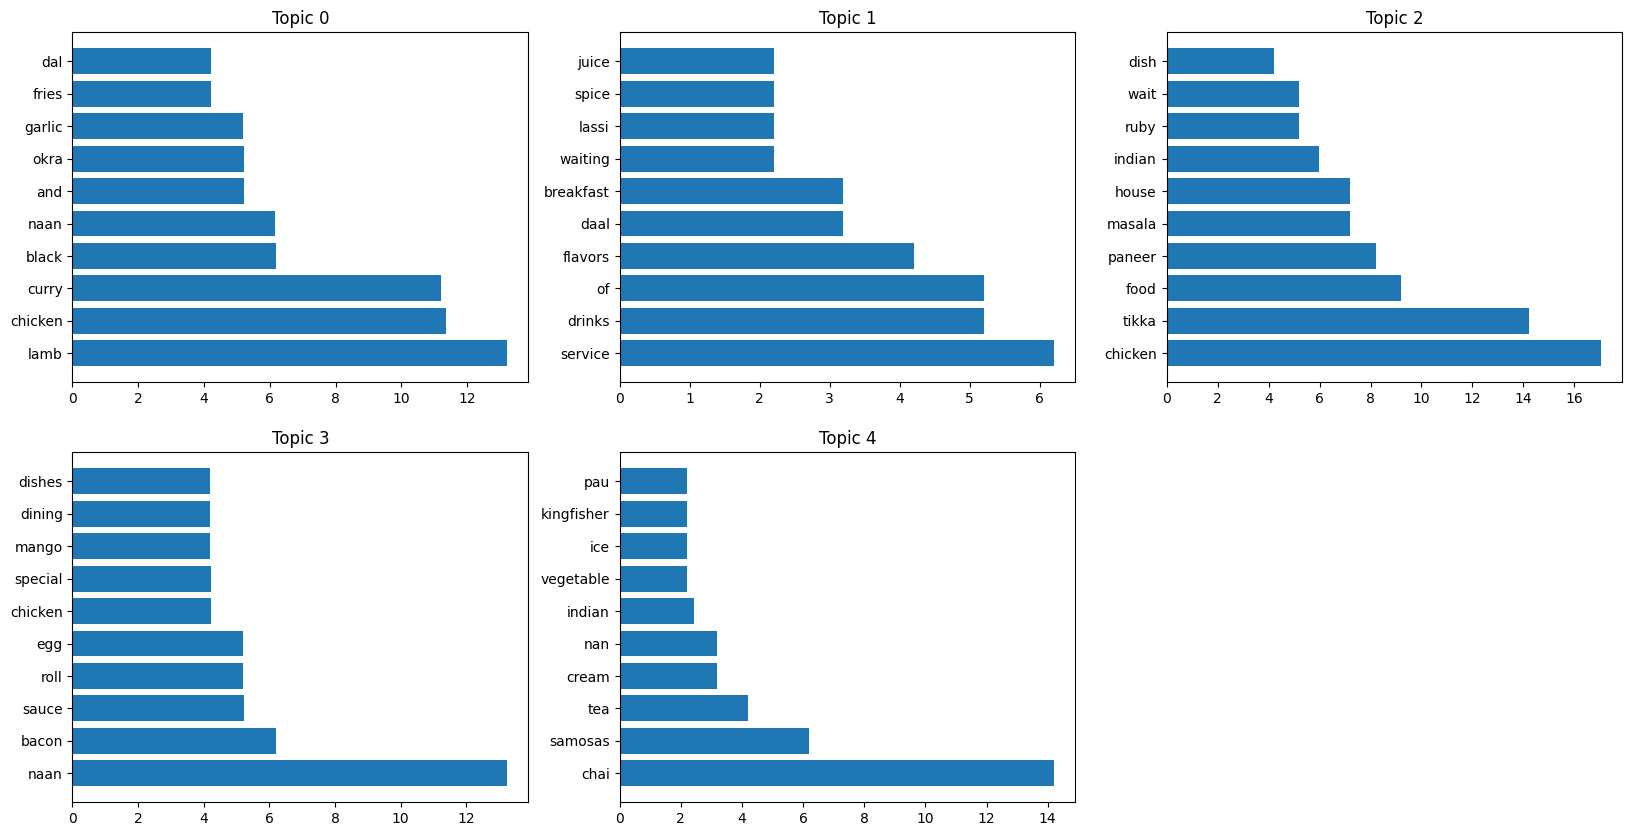

In [31]:
fig = plt.figure(figsize=(20,10))

for key in topic_all.keys():
    plt.subplot(2, 3, key + 1)
    words = [tup[0] for tup in topic_all[key]]
    scores = [tup[1] for tup in topic_all[key]]
    plt.barh(words, scores)
    plt.title(f"Topic {key}")
    

plt.show()